<a href="https://colab.research.google.com/github/S-M-Abrar-Hossain-Asif/customer-churn-eda/blob/main/bankchurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Customer Churn data analysis project


EDA (Exploratory Data Analysis)


In [ ]:
import numpy as np
import pandas as pd


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving churn.csv to churn.csv


In [ ]:

df = pd.read_csv('churn.csv')
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


In [ ]:
df = df.drop('RowNumber', axis=1)

In [ ]:
duplicates = df[df.duplicated(subset=['CustomerId', 'Surname'])]

print(duplicates)

Empty DataFrame
Columns: [CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []


We did not find any duplicate data.

In [ ]:
print(df.drop('CustomerId', axis=1).describe())

        CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
std       96.653299     10.487806      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

         HasCrCard  IsActiveMember  EstimatedSalary        Exited  
count  10000.00000    10000.000000     10000.000000  10000.000000  
mean       0.70550        0.515100    100090.239881      0.203700  
std        0.45584        0.499797     57510.492818      0.402769 

In [ ]:
# Missing Value
print(df.isnull().sum())

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


There is no missing value.

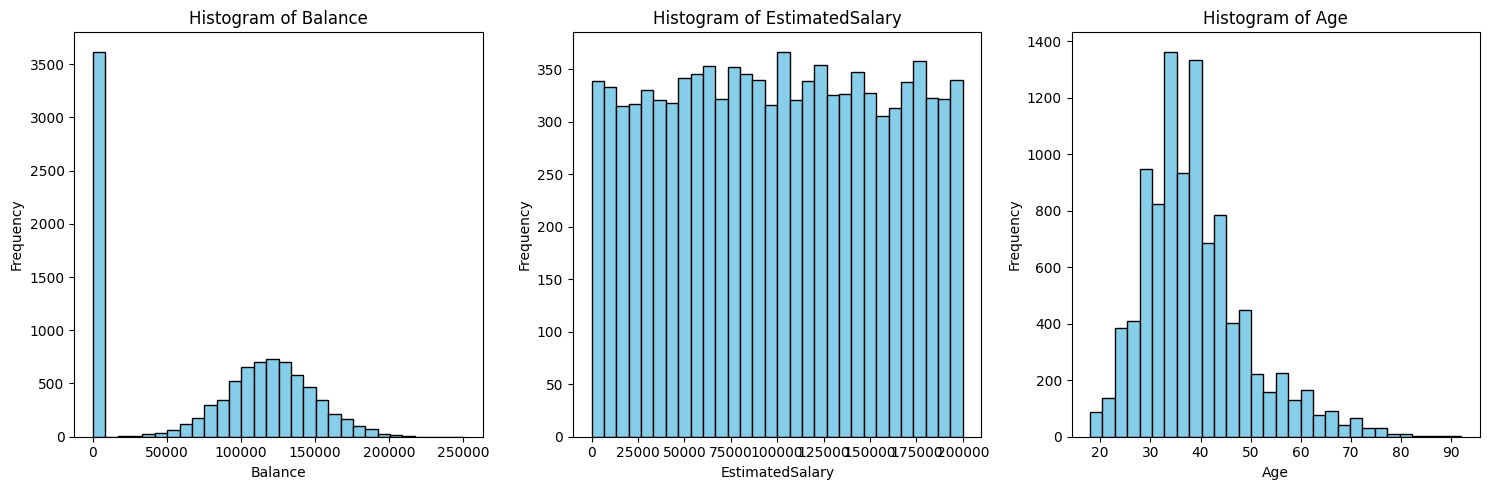

In [ ]:
# Histogram
import matplotlib.pyplot as plt

focus_cols = ['Balance', 'EstimatedSalary', 'Age']

plt.figure(figsize=(15, 5))
for i, col in enumerate(focus_cols):
    plt.subplot(1, 3, i+1)
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


Balance:
  Q1 = 0.00, Q3 = 127644.24, IQR = 127644.24
  Lower Bound = -191466.36, Upper Bound = 319110.60
  Outliers Found: 0



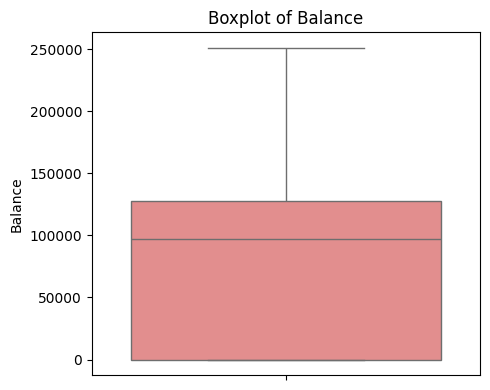

EstimatedSalary:
  Q1 = 51002.11, Q3 = 149388.25, IQR = 98386.14
  Lower Bound = -96577.10, Upper Bound = 296967.45
  Outliers Found: 0



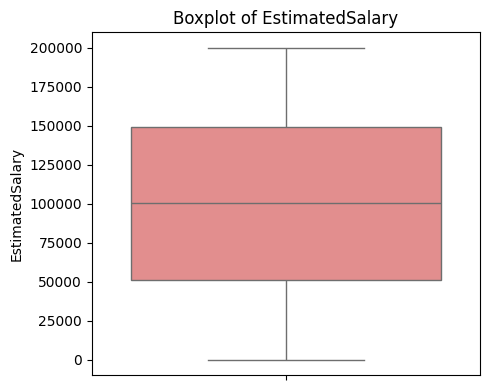

Age:
  Q1 = 32.00, Q3 = 44.00, IQR = 12.00
  Lower Bound = 14.00, Upper Bound = 62.00
  Outliers Found: 359



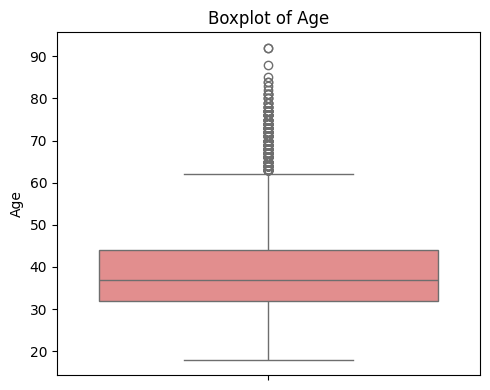

In [ ]:

#Boxplot
import seaborn as sns

def detect_and_plot_outliers(df, column):
    # Calculate IQR and bounds
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Print outlier summary
    print(f"{column}:\n"
          f"  Q1 = {Q1:.2f}, Q3 = {Q3:.2f}, IQR = {IQR:.2f}\n"
          f"  Lower Bound = {lower_bound:.2f}, Upper Bound = {upper_bound:.2f}\n"
          f"  Outliers Found: {len(outliers)}\n")

    # Plot boxplot
    plt.figure(figsize=(5, 4))
    sns.boxplot(y=df[column], color='lightcoral')
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()
    plt.show()

# Run for each key column
for col in ['Balance', 'EstimatedSalary', 'Age']:
    detect_and_plot_outliers(df, col)


359 outliers were detected based on IQR method in age. These could be older customers or possibly errors. Further analysis is needed to determine whether these outliers should be removed or treated differently, especially if age significantly affects churn.

In [ ]:
churned_df = df[df['Exited'] == 1].reset_index(drop=True)

In [ ]:
print(churned_df.drop('CustomerId', axis=1).describe())

       CreditScore          Age       Tenure        Balance  NumOfProducts  \
count  2037.000000  2037.000000  2037.000000    2037.000000    2037.000000   
mean    645.351497    44.837997     4.932744   91108.539337       1.475209   
std     100.321503     9.761562     2.936106   58360.794816       0.801521   
min     350.000000    18.000000     0.000000       0.000000       1.000000   
25%     578.000000    38.000000     2.000000   38340.020000       1.000000   
50%     646.000000    45.000000     5.000000  109349.290000       1.000000   
75%     716.000000    51.000000     8.000000  131433.330000       2.000000   
max     850.000000    84.000000    10.000000  250898.090000       4.000000   

         HasCrCard  IsActiveMember  EstimatedSalary  Exited  
count  2037.000000     2037.000000      2037.000000  2037.0  
mean      0.699067        0.360825    101465.677531     1.0  
std       0.458776        0.480358     57912.418071     0.0  
min       0.000000        0.000000        11.5800

In [ ]:
churn_counts = churned_df['Geography'].value_counts().reset_index()
churn_counts.columns = ['Geography', 'Churned_Customers']

<ipython-input-22-11c6362eefd2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=geo_churn, x='Geography', y='Churn_Rate', palette='coolwarm')


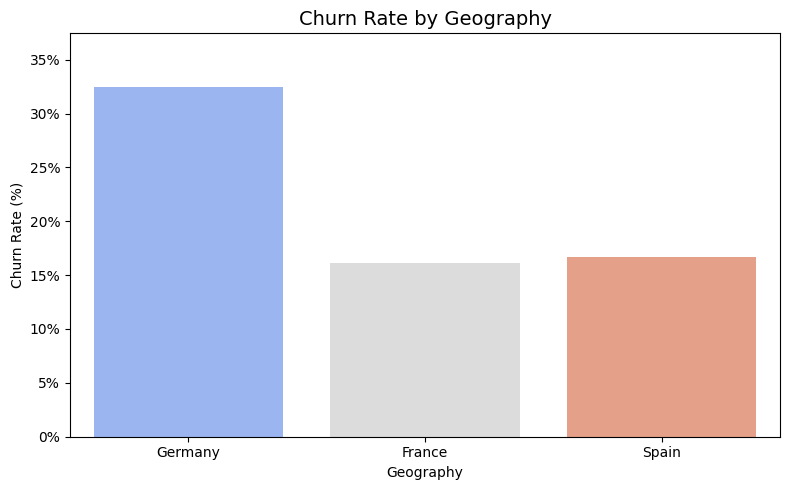

In [ ]:
#Bar Diagram
total_counts = df['Geography'].value_counts().reset_index()
total_counts.columns = ['Geography', 'Total_Customers']
geo_churn = pd.merge(churn_counts, total_counts, on='Geography')
geo_churn['Churn_Rate'] = geo_churn['Churned_Customers'] / geo_churn['Total_Customers']
plt.figure(figsize=(8, 5))
sns.barplot(data=geo_churn, x='Geography', y='Churn_Rate', palette='coolwarm')
plt.title('Churn Rate by Geography', fontsize=14)
plt.xlabel('Geography')
plt.ylabel('Churn Rate (%)')
plt.ylim(0, geo_churn['Churn_Rate'].max() + 0.05)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.tight_layout()
plt.show()

Germany has a significantly higher churn rate compared to France and Spain. Customers in Germany are almost twice as likely to churn as those in France or Spain. France and Spain have very similar and much lower churn rates. This suggests that factors influencing churn in these two countries might be similar, and distinct from those in Germany.

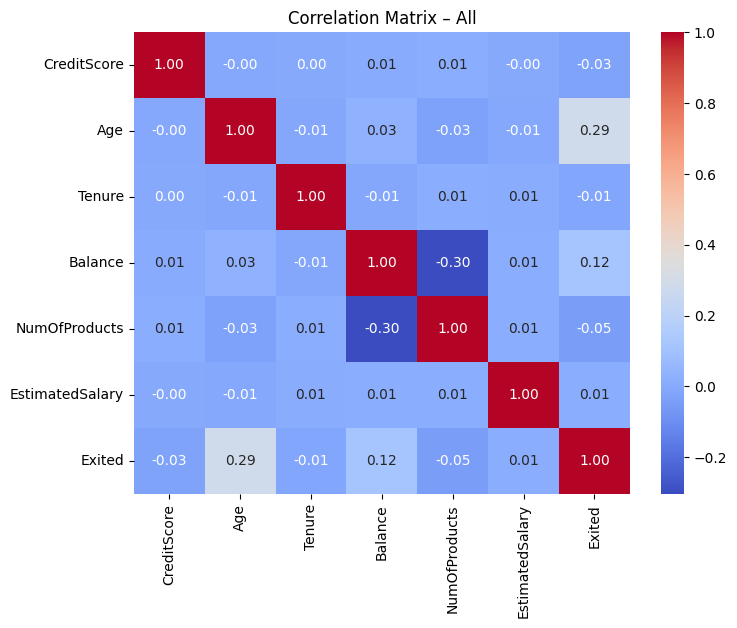

In [ ]:
#Correlation matrix
cols_to_check = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary','Exited']
correlation_matrix = df[cols_to_check].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix – All')
plt.show()

The correlation coefficient between Age and Exited is 0.29, the highest in the matrix.Older customers are significantly more likely to leave the bank (churn) compared to younger ones. This suggests that retention strategies should prioritize older demographics, possibly through tailored services or loyalty programs.
The correlation between Balance and Exited is 0.12.Customers with higher account balances are slightly more likely to churn. This could indicate dissatisfaction among high-value customers or better offers from competitors targeting them.
Number of Products has a weak negative correlation with churn (Exited,-.05), suggesting that customers with more products (e.g., multiple accounts or services) are marginally less likely to leave.Bundling products or cross-selling might help reduce churn.
CreditScore and EstimatedSalary have negligible impact on churn.


<ipython-input-29-fdb87f3a4f98>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_churn_counts, x='AgeGroup', y='ChurnCount', palette='magma')


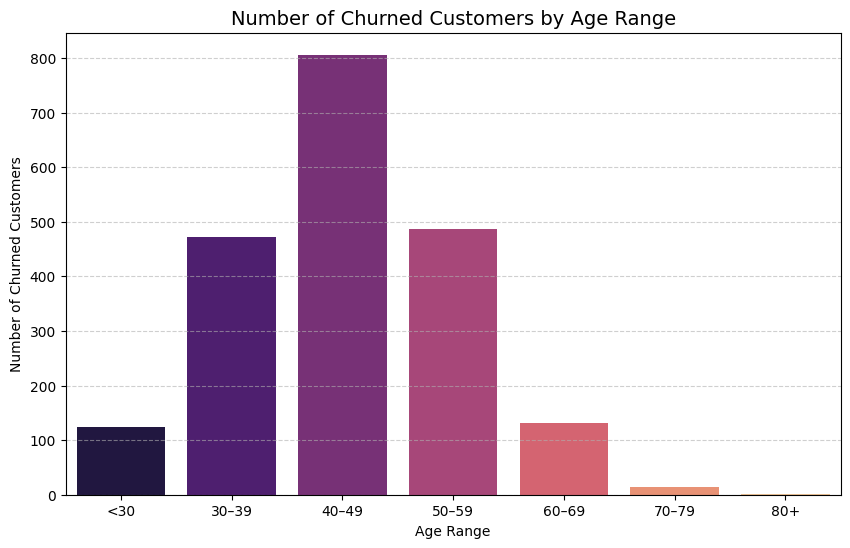

In [ ]:
#Bar Diagram
bins = [17, 29, 39, 49, 59, 69, 79, 92]
labels = ['<30', '30–39', '40–49', '50–59', '60–69', '70–79', '80+']
churned_df['AgeGroup'] = pd.cut(churned_df['Age'], bins=bins, labels=labels, right=True)
age_churn_counts = churned_df['AgeGroup'].value_counts().sort_index().reset_index()
age_churn_counts.columns = ['AgeGroup', 'ChurnCount']
plt.figure(figsize=(10, 6))
sns.barplot(data=age_churn_counts, x='AgeGroup', y='ChurnCount', palette='magma')
plt.title('Number of Churned Customers by Age Range', fontsize=14)
plt.xlabel('Age Range')
plt.ylabel('Number of Churned Customers')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

The chart shows a general pattern where churn is highest in the middle age ranges (30-59) and lower at the extremes (younger and older customers).

<ipython-input-30-6be081162de4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=churned_df, x='AgeGroup', y='Balance', palette='viridis')


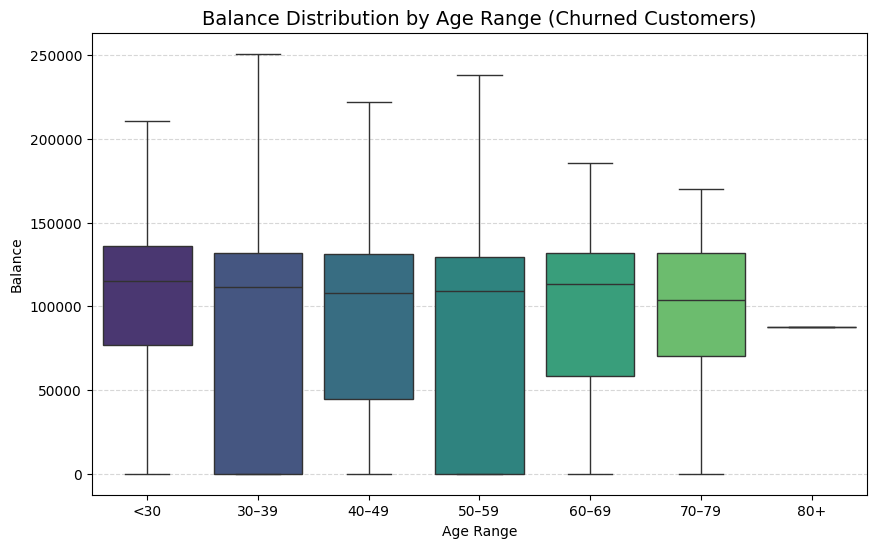

In [ ]:
churned_df = churned_df.copy()
churned_df['AgeGroup'] = pd.cut(churned_df['Age'], bins=bins, labels=labels, right=True)
plt.figure(figsize=(10, 6))
sns.boxplot(data=churned_df, x='AgeGroup', y='Balance', palette='viridis')
plt.title('Balance Distribution by Age Range (Churned Customers)', fontsize=14)
plt.xlabel('Age Range')
plt.ylabel('Balance')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Customers aged 40-59 who churned held the highest bank balances, indicating high-value clients are more likely to leave.

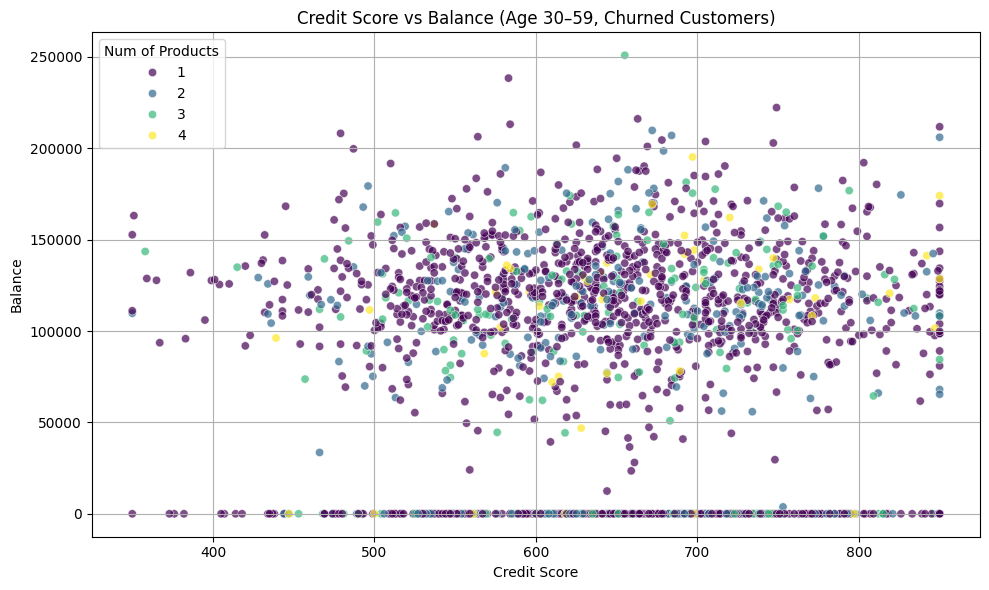

In [ ]:
churn_30_59 = churned_df[(churned_df['Age'] >= 30) & (churned_df['Age'] <= 59)]
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=churn_30_59,
    x='CreditScore',
    y='Balance',
    hue='NumOfProducts',
    palette='viridis',  # or 'coolwarm', 'Spectral', etc.
    alpha=0.7
)

plt.title('Credit Score vs Balance (Age 30–59, Churned Customers)')
plt.xlabel('Credit Score')
plt.ylabel('Balance')
plt.legend(title='Num of Products')
plt.grid(True)
plt.tight_layout()
plt.show()

Customers with fewer products are more prevalent among churners in the 30-59 age bracket.

<ipython-input-32-97d6aaa676e0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_30_59['CreditScoreBin'] = pd.cut(churn_30_59['CreditScore'], bins=credit_bins, labels=credit_labels)
<ipython-input-32-97d6aaa676e0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_30_59['BalanceBin'] = pd.cut(churn_30_59['Balance'], bins=balance_bins, labels=balance_labels)
<ipython-input-32-97d6aaa676e0>:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a futu

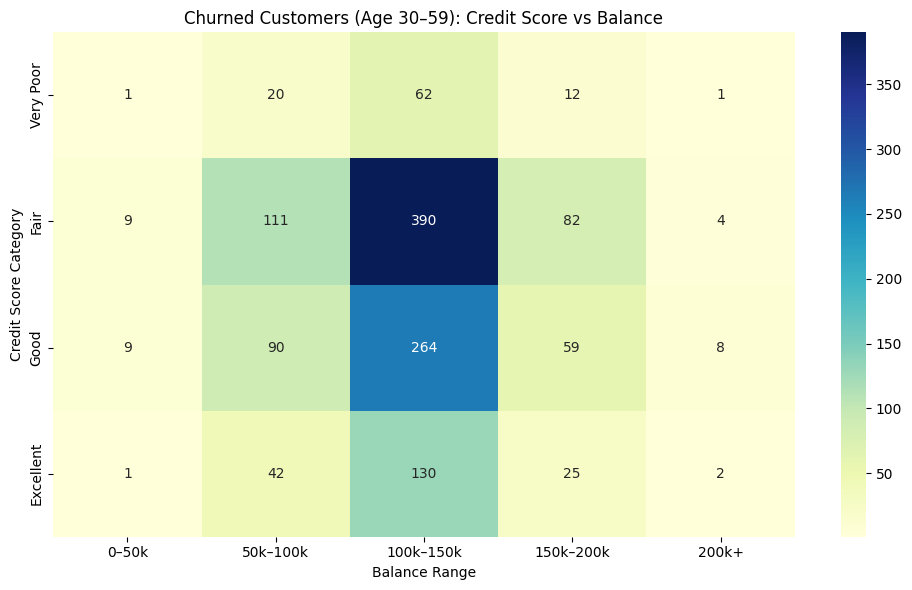

In [ ]:
credit_bins = [300, 500, 650, 750, 850]
credit_labels = ['Very Poor', 'Fair', 'Good', 'Excellent']
churn_30_59['CreditScoreBin'] = pd.cut(churn_30_59['CreditScore'], bins=credit_bins, labels=credit_labels)
balance_bins = [0, 50000, 100000, 150000, 200000, 250000]
balance_labels = ['0–50k', '50k–100k', '100k–150k', '150k–200k', '200k+']
churn_30_59['BalanceBin'] = pd.cut(churn_30_59['Balance'], bins=balance_bins, labels=balance_labels)
# Create pivot table
heatmap_data = churn_30_59.pivot_table(index='CreditScoreBin', columns='BalanceBin', aggfunc='size', fill_value=0)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Churned Customers (Age 30–59): Credit Score vs Balance')
plt.xlabel('Balance Range')
plt.ylabel('Credit Score Category')
plt.tight_layout()
plt.show()

Fair-credit customers (especially with 50k-150k balances) churn most—target them with financial wellness programs.

Excellent-credit holders churn least, but high-balance losses (>200k) are costly—offer premium perks to retain them.

Summary:
Age has the strongest positive correlation with churn (0.29). Older customers (especially those over 50) are significantly more likely to leave the bank. Retention strategies should prioritize this age group with tailored services or loyalty programs.

Geography is a key factor. Germany has nearly twice the churn rate of France and Spain. This indicates that churn drivers may be region-specific and that German customers require closer attention.

Balance shows a moderate positive correlation (0.12) with churn. Interestingly, high-balance customers are more likely to churn, suggesting dissatisfaction or competitive offers. Retaining these valuable customers is crucial.

Credit Score and Estimated Salary have negligible direct influence on churn. However, segment-level insights show that:

Fair-credit customers with balances between 50k–150k churn most—these could be targeted with financial wellness initiatives.

Excellent-credit customers churn less, but losing high-balance accounts (>200k) can be costly. Premium services could help retain them.

Number of Products has a weak negative correlation with churn (-0.05), implying that product bundling or cross-selling may improve customer stickiness.

Outlier Detection:

359 outliers were found in the Age variable based on the IQR method. These may reflect older, high-risk individuals rather than errors, and require further review before modeling.